# Robot@Home 2 - Loading dataset in Google Colab. `v0.1`

`R@H2 notebook series`   

<a href="https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/140-Loading-dataset-in-Google-Colab.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>



## Introduction

In the preceding notebooks, the Google Drive has served as the  repository for the dataset. The process of mounting a shared drive that contains the Robot@Home2 dataset has been illustrated, followed by the execution of code on the shared resource. However, this approach suffers from low bandwidth connectivity between the Google Colab instance and Google Drive.

Having acquired proficiency in managing Robot@Home2 in Colab, it is imperative to enhance the method employed. To achieve this, the dataset will be installed locally, taking advantage of the fast storage capabilities of the Colab instance. Consequently, the code execution will be performed on the local dataset, thereby improving overall performance.

## Local installation

First, we start by creating our working directories.

In [ ]:
!mkdir -p /content/R@H2/files
!mkdir -p /content/WORKSPACE

We continue downloading the database, `rh.db`, and a tar file, `Robot@Home2_files.tgz`, with the images and scenes. It will take ~2 minutes.

In [ ]:
%cd /content/WORKSPACE
!gdown 1qmvhcPrMTNKtWpGfWQHUPVqE67356N6I # .rh
%cd /content/R@H2
!gdown 17Mt2KzwJMjvagrP1X-Q0SVbAGUc1M7TW # Robot@Home2_db.tgz
!gdown 1zdG4zA55MrQ6r12L_Fg2KIJgnpD479rf # Robot@Home2_files.tgz

/content/WORKSPACE
Downloading...
From: https://drive.google.com/uc?id=1qmvhcPrMTNKtWpGfWQHUPVqE67356N6I
To: /content/WORKSPACE/.rh
100% 211/211 [00:00<00:00, 337kB/s]
/content/R@H2
Downloading...
From: https://drive.google.com/uc?id=17Mt2KzwJMjvagrP1X-Q0SVbAGUc1M7TW
To: /content/R@H2/Robot@Home2_db.tgz
100% 517M/517M [00:09<00:00, 53.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zdG4zA55MrQ6r12L_Fg2KIJgnpD479rf
To: /content/R@H2/Robot@Home2_files.tgz
100% 12.5G/12.5G [02:21<00:00, 88.0MB/s]


Then we decompress them. It will take ~6 minutes.

In [ ]:
!echo Decompressing database
!tar -xzf Robot@Home2_db.tgz
!echo Decompressing files
!echo '|================================================> 100%'
!tar -xzf Robot@Home2_files.tgz -C ./files --checkpoint=.50000

Decompressing database
Decompressing files
|================================================> 100%
..................................................

Finally, we can delete the compressed files and change to our working directory.

In [ ]:
!rm /content/R@H2/Robot@Home2_db.tgz
!rm /content/R@H2/Robot@Home2_files.tgz

In [ ]:
%cd /content/WORKSPACE

/content/WORKSPACE


We have finished the process with this folder structure:

    /content
     ├─── /R@H2
     │    │   └── /files
     │    │      ├── /rgbd
     │    │      └── /scene
     │    └────── rh.db
     └─── /WORKSPACE
           └── .rh

## Mounting Google Drive

Remember that Colab's storage is not persistent, so if you need to permanently save the generated data you must mount your Google Drive share:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Installation check

Now, we will run some code to check database connection and image retrieval.

In [ ]:
!pip install robotathome --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.2 MB/s eta 0:00:00


2023-04-20 18:23:10.302 | SUCCESS  | robotathome.core.reader:__open_dataset:141 - Connection is established: rh.db
2023-04-20 18:23:10.683 | INFO     | __main__:<cell line: 21>:21 - Sensor observation 100000 files
 RGB file   : /content/R@H2/files/rgbd/session_1/alma/bathroom1/subsession_1/100000_intensity.png
 Depth file : /content/R@H2/files/rgbd/session_1/alma/bathroom1/subsession_1/100000_depth.png


# Labeled RGBD set: 32937 observations with 14 fields


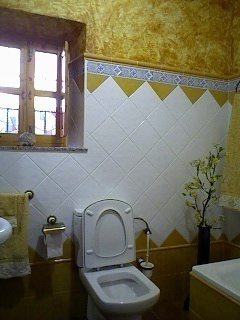

In [ ]:
from robotathome import RobotAtHome
from robotathome import logger, log, set_log_level

from IPython.display import Image

log.set_log_level('INFO')  # SUCCESS is the default

# Create an instance of the RobotAtHome class
try: 
      rh = RobotAtHome()
except:
      logger.error("Something was wrong")

# The full dataset is returned by default
lblrgbd = rh.get_sensor_observations('lblrgbd')
print(f"# Labeled RGBD set: {len(lblrgbd)} observations with {len(lblrgbd.columns)} fields")   

# Let's look any observation, e.g. id = 100000
id = 100000
[rgb_f, d_f] = rh.get_RGBD_files(id)
logger.info("Sensor observation {} files\n RGB file   : {}\n Depth file : {}", id, rgb_f, d_f )

# Show the image
Image(rgb_f)